In [0]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [0]:
# For reading stock data from yahoo
import pandas_datareader as web

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [0]:
# List of Tech_stocks for analytics
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for grabing google finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in tech_list:
    globals()[stock] = web.get_data_yahoo('GOOGL',start,end)

In [0]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-01,1224.199951,1203.189941,1213.000000,1208.530029,1658200,1208.530029
2018-10-02,1224.520020,1199.660034,1206.670044,1207.640015,2009000,1207.640015
2018-10-03,1214.180054,1202.150024,1212.000000,1211.530029,1312300,1211.530029
2018-10-04,1205.900024,1163.849976,1205.030029,1177.069946,2328800,1177.069946
2018-10-05,1182.000000,1154.319946,1176.000000,1167.829956,1592600,1167.829956


In [0]:
# Summary stats for Apple Stock
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,1149.067959,1126.078921,1137.816159,1137.972517,1.736872e+06,1137.972517
std,60.797458,65.201708,62.894697,63.700094,8.404870e+05,63.700094
min,1012.119995,977.659973,984.320007,984.669983,7.076000e+05,984.669983
25%,1099.962524,1075.347534,1087.989990,1086.059998,1.222200e+06,1086.059998
50%,1144.229980,1123.565002,1133.470032,1134.509949,1.532200e+06,1134.509949
75%,1200.312469,1181.690002,1191.447479,1190.472534,2.003025e+06,1190.472534
max,1296.969971,1271.709961,1280.510010,1296.199951,6.658900e+06,1296.199951


In [0]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-10-01 to 2019-09-27
Data columns (total 6 columns):
High         250 non-null float64
Low          250 non-null float64
Open         250 non-null float64
Close        250 non-null float64
Volume       250 non-null int64
Adj Close    250 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


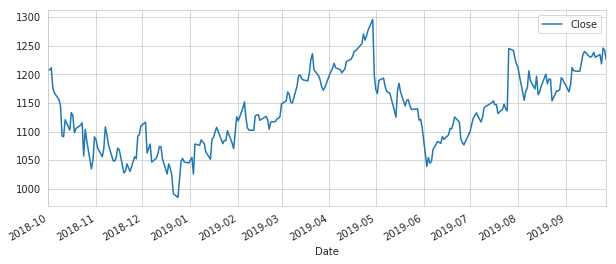

In [0]:
# A historical view of the closing price
AAPL['Close'].plot(legend=True, figsize=(10,4))

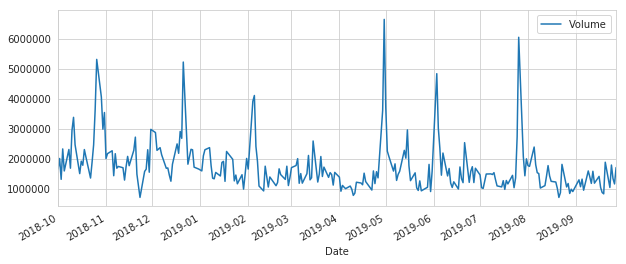

In [0]:
#  the total volume of stock being traded each day over the past year

AAPL['Volume'].plot(legend=True, figsize=(10,4))

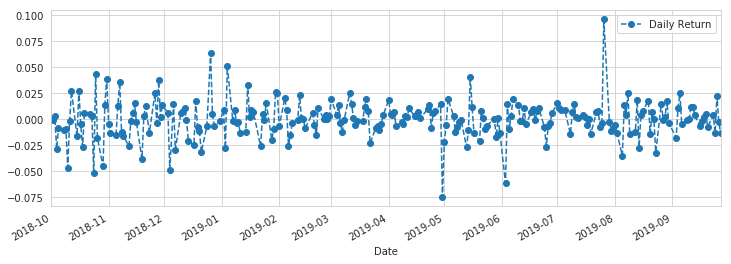

In [0]:
#  pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()

#  the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

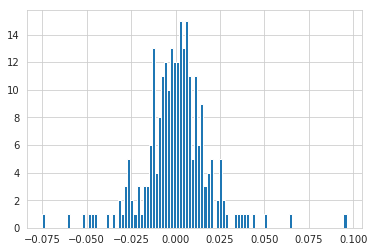

In [0]:
# only with histogram
AAPL['Daily Return'].hist(bins=100)

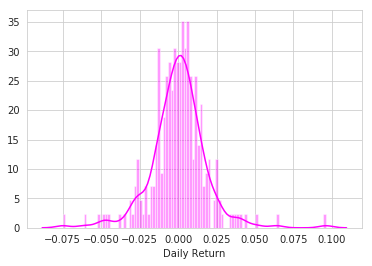

In [0]:

sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta')

In [0]:
# Grab all the closing prices for the tech stock list into one DataFrame

closingprice_df = web.get_data_yahoo(tech_list,start,end)['Close']

In [0]:
closingprice_df.head(10)

Symbols,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2018-10-01,227.259995,2004.359985,1208.530029,115.610001
2018-10-02,229.279999,1971.310059,1207.640015,115.150002
2018-10-03,232.070007,1952.760010,1211.530029,115.169998
2018-10-04,227.990005,1909.420044,1177.069946,112.790001
2018-10-05,224.289993,1889.650024,1167.829956,112.129997
2018-10-08,223.770004,1864.420044,1155.920044,110.849998
2018-10-09,226.869995,1870.319946,1145.170044,112.260002
2018-10-10,216.360001,1755.250000,1092.160034,106.160004
2018-10-11,214.449997,1719.359985,1090.739990,105.910004


In [0]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [0]:
tech_returns.head()

Symbols,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2018-10-01,NaN,NaN,NaN,NaN
2018-10-02,0.008889,-0.016489,-0.000736,-0.003979
2018-10-03,0.012169,-0.009410,0.003221,0.000174
2018-10-04,-0.017581,-0.022194,-0.028443,-0.020665
2018-10-05,-0.016229,-0.010354,-0.007850,-0.005852


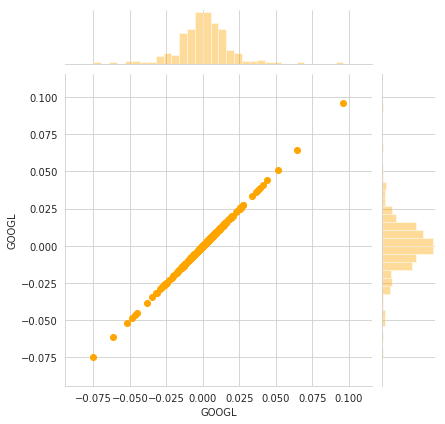

In [0]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOGL','GOOGL',tech_returns,kind='scatter',color='orange')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


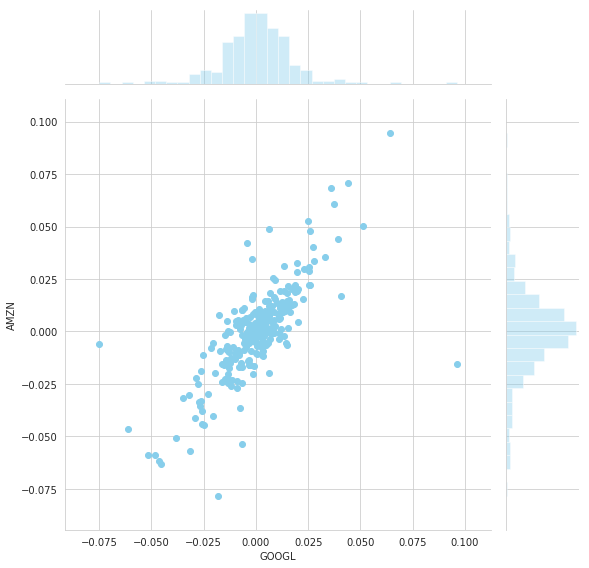

In [0]:
#  joinplot to compare the daily returns of Google and Amazon.

sns.jointplot('GOOGL','AMZN',tech_returns, kind='scatter',size=8, color='skyblue')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


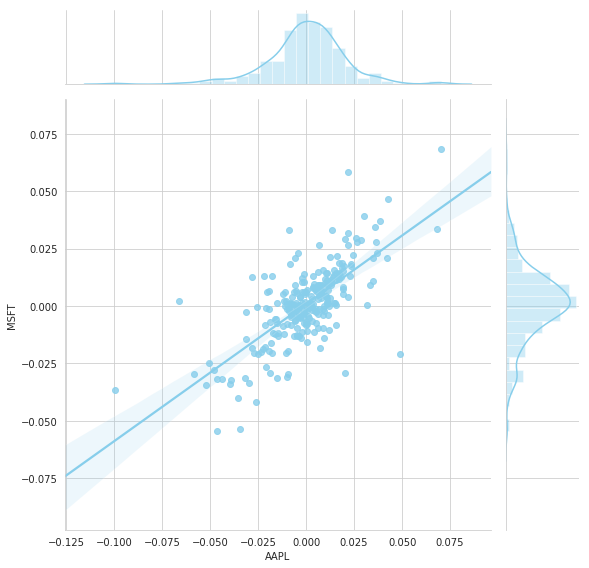

In [0]:
#  Apple and Microsoft with reg jointplot
sns.jointplot('AAPL','MSFT',tech_returns, kind='reg', size=8, color='skyblue')

**Risk** **Analysis**

In [0]:
#  defining a new DataFrame as a cleaned version of the orignal tech_returns DataFrame
rets = tech_returns.dropna()

In [0]:
rets.head()

Symbols,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2018-10-02,0.008889,-0.016489,-0.000736,-0.003979
2018-10-03,0.012169,-0.009410,0.003221,0.000174
2018-10-04,-0.017581,-0.022194,-0.028443,-0.020665
2018-10-05,-0.016229,-0.010354,-0.007850,-0.005852
2018-10-08,-0.002318,-0.013352,-0.010198,-0.011415


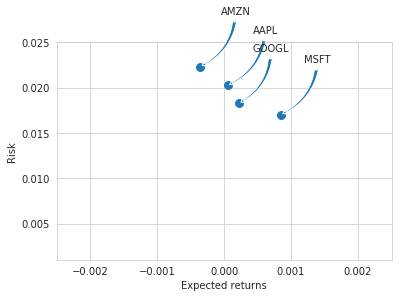

In [0]:

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

**Value** **at** **Risk** **using** **Monte**-**Carlo** **method** 

In [0]:
rets.head()

Symbols,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2018-10-02,0.008889,-0.016489,-0.000736,-0.003979
2018-10-03,0.012169,-0.009410,0.003221,0.000174
2018-10-04,-0.017581,-0.022194,-0.028443,-0.020665
2018-10-05,-0.016229,-0.010354,-0.007850,-0.005852
2018-10-08,-0.002318,-0.013352,-0.010198,-0.011415


In [0]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

#  grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOGL']

#  grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOGL']

In [0]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Shock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [0]:
# For Google Stock - GOOGL
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-01,1224.199951,1203.189941,1213.000000,1208.530029,1658200,1208.530029
2018-10-02,1224.520020,1199.660034,1206.670044,1207.640015,2009000,1207.640015
2018-10-03,1214.180054,1202.150024,1212.000000,1211.530029,1312300,1211.530029
2018-10-04,1205.900024,1163.849976,1205.030029,1177.069946,2328800,1177.069946
2018-10-05,1182.000000,1154.319946,1176.000000,1167.829956,1592600,1167.829956


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

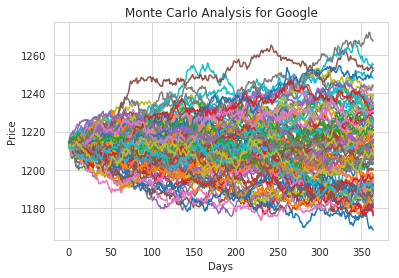

In [0]:
start_price = 1213.00

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [0]:
#  Google stock price
start_price = 1213.00

# Set a large number of runs
runs = 1000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock(GOOGL) after 365 days')

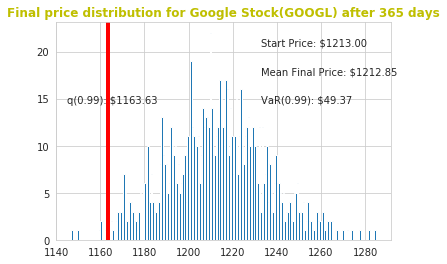

In [0]:

#  defining q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

#  plot the distribution of the end prices
plt.hist(simulations, bins=200)


# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plotting a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Google Stock(GOOGL) after %s days" % days, weight='bold', color='Y')